In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
%matplotlib inline
train = pd.read_csv('titanic_train.csv')

<Axes: >

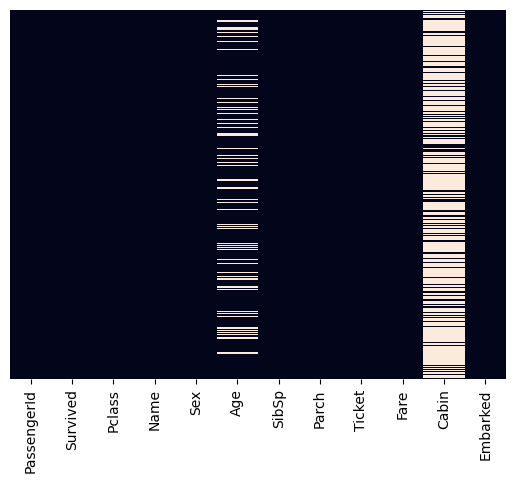

In [2]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

In [3]:
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


<Axes: xlabel='Survived', ylabel='count'>

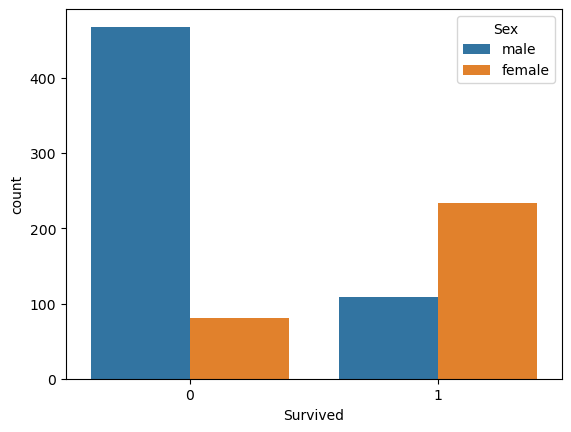

In [4]:
sns.countplot(data = train,x= 'Survived',hue = 'Sex')

#sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

<Axes: ylabel='Frequency'>

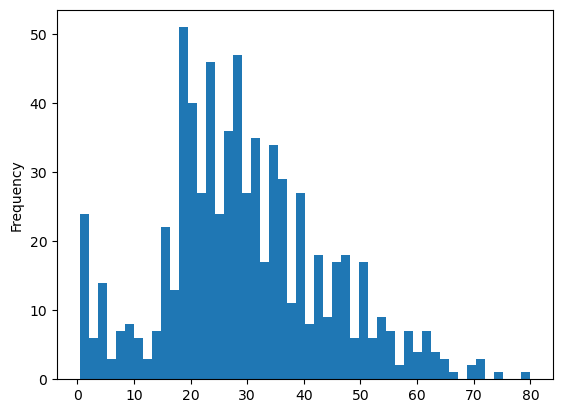

In [5]:
train['Age'].plot.hist(bins=50)

<Axes: ylabel='Frequency'>

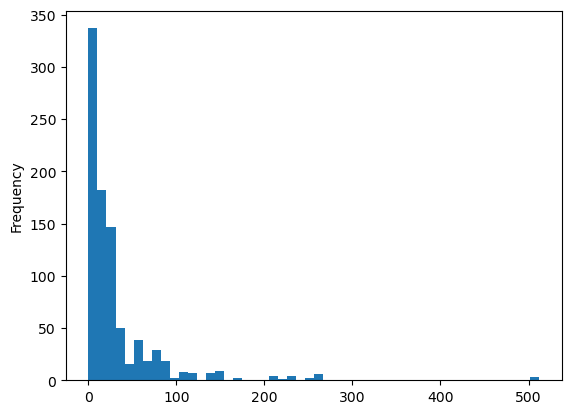

In [6]:
train['Fare'].plot.hist(bins=50)

<Axes: xlabel='SibSp', ylabel='count'>

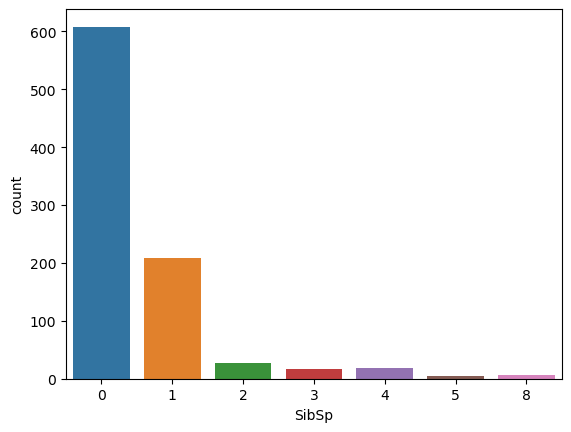

In [7]:
sns.countplot(data = train,x= 'SibSp')

<Axes: xlabel='Pclass', ylabel='Age'>

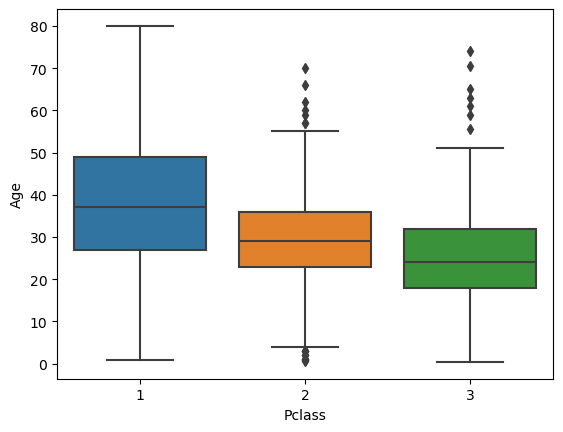

In [8]:
sns.boxplot(data=train,x = 'Pclass',y = 'Age')

In [9]:
def myfunc(cols):
    pclass = cols[0]
    age = cols[1]
    if pd.isnull(age):
        if pclass == 1:
            return 37
        elif pclass == 2:
            return 29
        else:
            return 24
    else:
        return age

In [10]:
train['Age'] = train[['Pclass','Age']].apply(myfunc,axis = 1)

C:\Users\Farooque\AppData\Local\Temp\ipykernel_11516\499027973.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\Farooque\AppData\Local\Temp\ipykernel_11516\499027973.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [11]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
sex = pd.get_dummies(train['Sex'],dtype=float,drop_first=True)

In [13]:
emb = pd.get_dummies(train['Embarked'],dtype=float,drop_first=True)

In [14]:
train = pd.concat([train,sex,emb],axis = 1)

In [15]:
train.drop(['PassengerId','Name','Embarked','Sex','Ticket'],inplace=True,axis = 1)

In [16]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S
0,0,3,22.0,1,0,7.2500,NaN,1.0,0.0,1.0
1,1,1,38.0,1,0,71.2833,C85,0.0,0.0,0.0
2,1,3,26.0,0,0,7.9250,NaN,0.0,0.0,1.0
3,1,1,35.0,1,0,53.1000,C123,0.0,0.0,1.0
4,0,3,35.0,0,0,8.0500,NaN,1.0,0.0,1.0


In [17]:
pclass = pd.get_dummies(train['Pclass'],dtype = float,drop_first=True)

In [18]:
train = pd.concat([train,pclass],axis=1)

In [19]:
train.drop('Pclass',axis = 1,inplace=True)

In [20]:
train.drop('Cabin',axis = 1,inplace=True)

In [21]:
train.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1.0,0.0,1.0,0.0,1.0
1,1,38.0,1,0,71.2833,0.0,0.0,0.0,0.0,0.0
2,1,26.0,0,0,7.9250,0.0,0.0,1.0,0.0,1.0
3,1,35.0,1,0,53.1000,0.0,0.0,1.0,0.0,0.0
4,0,35.0,0,0,8.0500,1.0,0.0,1.0,0.0,1.0


<Axes: >

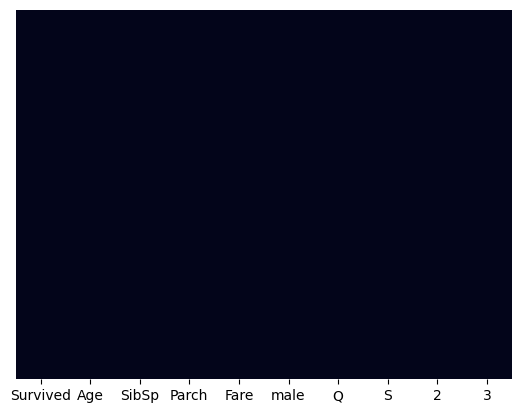

In [22]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X = train.drop('Survived',axis=1)
y = train['Survived']

In [25]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Survived
Non-Null Count  Dtype
--------------  -----
891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


In [31]:
X.columns = X.columns.astype(str)

In [32]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
logmodel = LogisticRegression()

In [35]:
logmodel.fit(X_train,y_train)

C:\Users\Farooque\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [36]:
prediction = logmodel.predict(X_test)

In [37]:
from sklearn import metrics
from sklearn.metrics import classification_report

In [38]:
metrics.mean_absolute_error(y_test,prediction)

0.1864406779661017

In [39]:
metrics.mean_squared_error(y_test,prediction)

0.1864406779661017

In [40]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       175
           1       0.80      0.72      0.76       120

    accuracy                           0.81       295
   macro avg       0.81      0.80      0.80       295
weighted avg       0.81      0.81      0.81       295



In [41]:
print('''               precision    recall  f1-score   support

          0       0.81      0.93      0.86       163
          1       0.85      0.65      0.74       104

avg / total       0.82      0.82      0.81       267''')

               precision    recall  f1-score   support

          0       0.81      0.93      0.86       163
          1       0.85      0.65      0.74       104

avg / total       0.82      0.82      0.81       267


In [42]:
print(metrics.confusion_matrix(y_test,prediction))

[[154  21]
 [ 34  86]]


In [94]:
test = pd.read_csv('titanic_test.csv')

In [44]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


<Axes: >

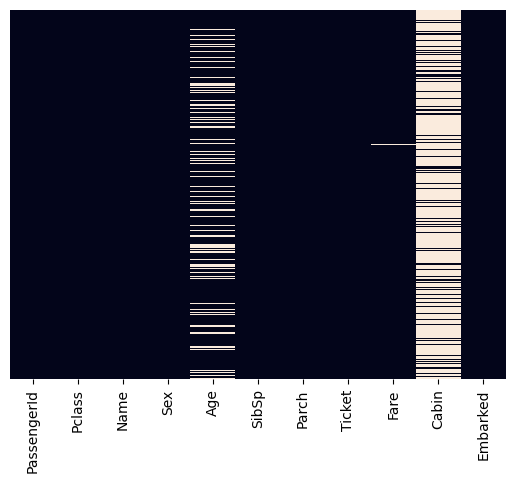

In [95]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False)

<Axes: xlabel='Pclass', ylabel='Age'>

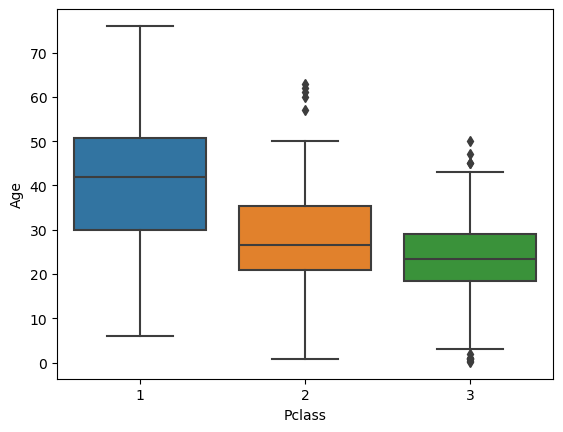

In [65]:
sns.boxplot(data = test,x = 'Pclass',y='Age')

In [63]:
test[test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [96]:
def newfunc(col):
    Pclass = col[0]
    Age = col[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 42
        elif Pclass == 2:
            return 26
        else:
            return 23
    else:
        return Age

In [97]:
test['Age'] = test[['Pclass','Age']].apply(newfunc,axis=1)

C:\Users\Farooque\AppData\Local\Temp\ipykernel_11516\1001382214.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\Farooque\AppData\Local\Temp\ipykernel_11516\1001382214.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



<Axes: >

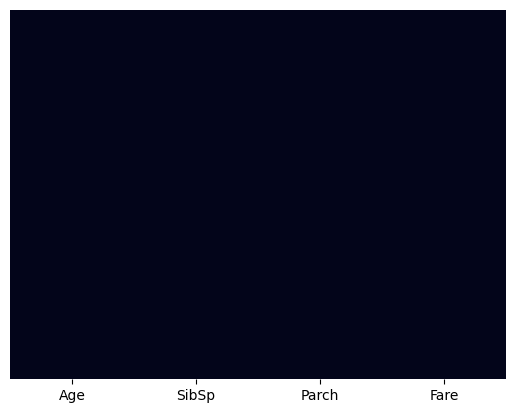

In [105]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False)

In [72]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [99]:
sex = pd.get_dummies(test['Sex'],dtype=float,drop_first=True)

In [100]:
pclass = pd.get_dummies(test['Pclass'],dtype=float,drop_first=True)

In [101]:
emb = pd.get_dummies(test['Embarked'],dtype=float,drop_first=True)

In [102]:
test.drop(['Name','Sex','Pclass','Cabin','Ticket','Embarked','PassengerId'],axis=1,inplace=True)

In [ ]:
test.dropna(inplace=True)

In [106]:
test = pd.concat((test,sex,emb,pclass),axis=1)

In [107]:
test.head()

,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,34.5,0.0,0.0,7.8292,1.0,1.0,0.0,0.0,1.0
1,47.0,1.0,0.0,7.0000,0.0,0.0,1.0,0.0,1.0
2,62.0,0.0,0.0,9.6875,1.0,1.0,0.0,1.0,0.0
3,27.0,0.0,0.0,8.6625,1.0,0.0,1.0,0.0,1.0
4,22.0,1.0,1.0,12.2875,0.0,0.0,1.0,0.0,1.0


In [109]:
test.columns = test.columns.astype(str)

In [110]:
train.columns = train.columns.astype(str)

,Age,SibSp,Parch,Fare,male,Q,S,2,3
709,24.0,1,1,15.2458,1.0,0.0,0.0,0.0,1.0
439,31.0,0,0,10.5000,1.0,0.0,1.0,1.0,0.0
840,20.0,0,0,7.9250,1.0,0.0,1.0,0.0,1.0
720,6.0,0,1,33.0000,0.0,0.0,1.0,1.0,0.0
39,14.0,1,0,11.2417,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
715,19.0,0,0,7.6500,1.0,0.0,1.0,0.0,1.0
525,40.5,0,0,7.7500,1.0,1.0,0.0,0.0,1.0
381,1.0,0,2,15.7417,0.0,0.0,0.0,0.0,1.0
140,24.0,0,2,15.2458,0.0,0.0,0.0,0.0,1.0


709    1
439    0
840    0
720    1
39     1
      ..
715    0
525    0
381    1
140    0
173    0
Name: Survived, Length: 295, dtype: int64

<Axes: >

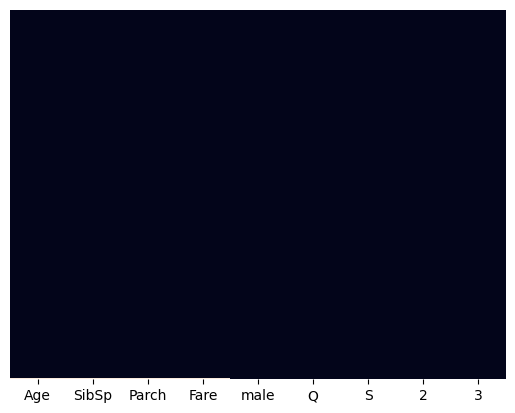

In [120]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False)

In [132]:
test[test['Age'].isnull()]

,Age,SibSp,Parch,Fare,male,Q,S,2,3


In [131]:
test.drop(152,inplace=True)

In [ ]:
newpred